In [1]:
# First code block is the import libraries  
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [5]:
dataPath = '../../spaceship-titanic_rawData/spaceship_train.csv'
df_public = pd.read_csv(dataPath)

df_public

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
# Check number of null values
df_public.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Transported
True     4378
False    4315
Name: count, dtype: int64


<Axes: xlabel='Transported', ylabel='count'>

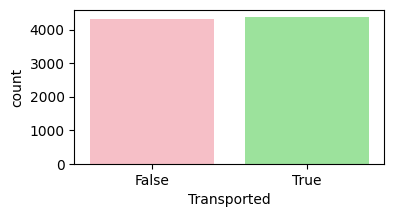

In [7]:
# Ratio of target variable
print(df_public["Transported"].value_counts())

plt.figure(figsize=(4,2))
colors = ["lightpink", "lightgreen"]  # Define desired colors
sns.countplot(df_public, x="Transported", hue="Transported", legend=False, palette=colors)

<h4> Investigate the correlation between targeted label and column features:</h><br>

# VIP
- nearly 97.67% are non-VIP
- Neither VIP nor not, their target label is evenly distributed

# HomePlanet
- Earth(54%), Europa(25%), Mars(20%)
- Earth - transported	10% less than non-transported
- Europa -> 16.53% is transported while 8.56% is not


# CryoSleep
- CryoSleep == `True`, higher chance to be transported
- CryoSleep == `False`, lower chance to be transported

# Destination
- almost equally distributed

In [47]:
pd.set_option('display.float_format', '{:.2%}'.format)

# VIP
df_vip = df_public.dropna(subset=['VIP'])
# df_vip.isnull().sum()
df_vip.value_counts(['VIP', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()


proportion
VIP   Transported            
True  True              0.90%
      False             1.45%
False True             49.45%
      False            48.21%

In [46]:
df_public.value_counts(['HomePlanet', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()


proportion
HomePlanet Transported            
Mars       True             10.83%
           False             9.88%
Europa     True             16.53%
           False             8.56%
Earth      True             22.97%
           False            31.22%

In [45]:
df_public.value_counts(['CryoSleep', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()

proportion
CryoSleep Transported            
True      True             29.29%
          False             6.54%
False     True             21.11%
          False            43.06%

In [48]:
df_public.value_counts(['Destination', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()

proportion
Destination   Transported            
TRAPPIST-1e   True             32.75%
              False            36.75%
PSO J318.5-22 True              4.71%
              False             4.64%
55 Cancri e   True             12.90%
              False             8.25%